# Not Just Another Genre Predictor - Supervised and Unsupervised Learning Algorithms for Genre Classification

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 3: Modeling - Supervised Learning Pipelines

### Table of Contents

1. Recap<br>
    1.1 [Business and Machine Learning Questions](#1.1)<br>
    1.2 [Modeling Expectations](#1.2)<br>
    1.3 [Feature Dictionary](#1.3)<br>
        
        
2. Preparing the Data<br>
    2.1 [Train Test Split](#2.1)<br>
    2.2 [A Note on PCA and Scaling](#2.2)<br>
    
    
3. [ML Pipelines](#3)<br>
    3.1 [Logistic Regression (Basline) Model Pipeline](#3.1)<br>
    3.2 [Support Vector Machine (SVM) Model Pipeline](#3.2)<br>
    3.3 [K-Nearest Neighbors (KNN) Model Pipeline](#3.3)<br>
    3.4 [Random Forest and Gradient Boost Models Pipeline](#3.4)<br>
        
        
4. [Ensemble Learning](#4)<br>
  
  
5. [Amalgamating the Results](#5)<br>

        
---
        

## 1. Recap

### 1.1 Business and Machine Learning Questions  <a id="1.1"></a>

#### Business Question

>Can we predict a song's popularity (and therefore value) based on its attributes

This is a limited measurement without access to more granular information such as geographical consumption metrics, social media penetration, etc.

We will work on a starter model focusing initially on song attribute clustering and genre analysis with a view to further development in the future to layer on value metrics, given access to the more granular information mentioned above and below.

**Creating a tool that can classify any given song into a genre or attribute-based cluster is a good first step in this direction. Which leads us to the Machine Learning Question:**

#### Machine Learning Question

>Can we derive song FEATURE PROFILES (by inspecting the song's audio attributes derived by Spotify) and ascribe VALUE to individual song features or FEATURE PROFILES

Often, songs are given a genre subjectively by music managers' opinion or songs carry genres from the Artists' genre identity, Developing an in-house model for categorising genre based on attributes, then layering on a popularity or value measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels - the aim here is to build a tool whereby any user can upload a song and be told what genre the song belongs to


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels - the aim here is to ignore conventional genre labels and create a tool where songs are grouped based on machine-derived feature profiles and are given VALUE IMPORTANCE based on clearly identifiable clusters

**A secondary goal from implementing the two models will be:**

3. can we define the song clusters in a way that is understandable to the average human music listener? we could cross reference the cluster outputs from the unsupervised algorithm against the genre classes from the supervised learning algorithm to deteremine whether any of the genres are 'natural' genres or not

### 1.2 Modeling Expectations  <a id="1.2"></a>

For the supervised learning algorithm we will perform hyperparamter optimisation and model selection to choose a best fit model for multiclass classification. We will build a pipeline and perform grid search, and apply scaling to transform the data within the pipeline. Grid search will implement a 5 fold cross validation as default, we will optimise for that within the pipeline also.

We will NOT use PCA as we believe the dataset has a small enough number of features - runtime may be more efficient with PCA but feature importance will be eaier to measure from our best estimators without appying PCA. If we find our models take prohibitively long to run then we will reconsider.

The models we will look at are:

- Logistic Regression (baseline)
- KNN
- SVM (multiclass)
- Random Forests

For the unsupervised learning algorithm we will look at 3 clustering methods to see which is the best fit for our dataset:

- K-Means
- DBSCAN
- Hierarchical Clustering

If we have time we will also look at how Neural Networks perform at classifying our songs.

**Expected outcomes:**

We expect that supervised learning will be challenged to correctly predict genre as there is much crossover across contemporary genres - we expect the unsupervised models to provide more interesting results and find clusters that can be interpreted as defined based on song types.

These clusters can then be combined with our metrics in future iterations of this project to:

- understand how value is created across song clusters
- help in deciding how to exploit any given song (by seeing which cluster it falls into and placing it in suitable mediums for exploitation)

... and much more.

We expect classical music, EDM and other contemporary genres to be identifiable separately as they are conceptually quite different from each other as groups.


### 1.3 Feature Dictionary  <a id="1.3"></a>

Let's revisit our data dictionary, focusing on the features we will analyse for the above models.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>song_name</code> </td>
    <td style="text-align: left">Name of Song</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>danceability</code></td>
    <td style="text-align: left">Describes how suitable a track is for dancing based on a combination of musical elements including temppo, rhythm stability, beat stregth and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>energy</code></td>
    <td style="text-align: left">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contribuiting to this attribute include dynamic range, perceived loudness, timbre, onset rate and general entropy.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>key</code></td>
    <td style="text-align: left">The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>loudness</code></td>
    <td style="text-align: left">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>mode</code></td>
    <td style="text-align: left">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>speechiness</code></td>
    <td style="text-align: left">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>acousticness</code></td>
    <td style="text-align: left">number A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>instrumentalness</code></td>
    <td style="text-align: left">Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>liveness</code></td>
    <td style="text-align: left">Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>valence</code></td>
    <td style="text-align: left">A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>tempo</code></td>
    <td style="text-align: left">The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>id</code></td>
    <td style="text-align: left">The Spotify ID for the track. This is our unique identifier, consider making this the index.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>uri</code></td>
    <td style="text-align: left">The Spotify URI for the track. A Spotify URI is a unique resource indicator code (and link) for music on their platform. It is a link to directly share your songs to fans.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>track_href</code></td>
    <td style="text-align: left">A link to the Web API endpoint providing full details of the track.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>analysis_url</code></td>
    <td style="text-align: left">A URL to access the full audio analysis of this track. An access token is required to access this data.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>duration_ms</code></td>
    <td style="text-align: left">The duration of the track in milliseconds.</td>
  </tr>
      <tr>
    <td style="text-align: left"><code>time_signature</code></td>
    <td style="text-align: left">An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".</td>
  </tr>
          <tr>
    <td style="text-align: left"><code>genre</code></td>
    <td style="text-align: left">Subjective genre given to each group of songs based on user perception.</td>
  </tr>
</table>

The dataset currently contains columns we won't be using for analysis, which we will drop when we perform feature selction below.

---

Let's import our packages and csv files

In [1]:
! pip install xgboost==1.1.1

In [2]:
# run functions notebook so can required functions
%run -i capstone_functions.ipynb

In [3]:
# import required packages
# packages will be added here as they come up during coding
# this is therefore a complete list of all packages used within this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

In [4]:
# import dataframe exported to csv from notebook #2
supervised_genres_df_final = pd.read_csv('../data/supervised_genres_df_final.csv', index_col=0)

## 2. Preparing the Data

### 2.1 Train Test Split  <a id="2.1"></a>

For our supervised learning algorithm we need to do a train test split so that we can set aside some unseen data, to see how our models perform on that unseen data once we have a fine-tuned model that we are happy with.

We will keep aside 25% as our test set. We don't need to create a validation set as we will use cross validation throughout.

In [5]:
# create test set
# set x (features) and y (target) columns
X = supervised_genres_df_final.drop(['genre_group'], axis=1)
y = supervised_genres_df_final['genre_group']

# create train test split keeping 25% for our test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=1)

### 2.2 A Note on PCA and Scaling  <a id="2.2"></a>

We're not going to use PCA as we only have 11 features and not doing PCA will make it easier to determine feature importance.

Running PCA could make the models more efficient and save runtime, but bar SVM all of our models run fairly quickly anyway.

We will be running scaling within our pipelines to make sure scaling is applied correctly within our CV folds, for the ensemble learning we will scale the data first.

## 3. ML Pipelines   <a id="3"></a>

- Logistic Regression
- SVM (multiclass)
- KNN
- Random Forests
- Gradient Boosting

We'll discuss each of the modeling methods in context of this project in each section below.

Let's run a Logistic Regression model as a baseline model. 

In [6]:
# create lists for model score and instance plotting later on
model_scores = []
model_names = []

In [35]:
# create class dictionary for later use
class_dict = {0:'classical', 1:'edm', 2:'latino/caribbean', 3:'pop', 4:'rap/hiphop', 5:'rock'}

### 3.1 Logistic Regression (Basline) Model Pipeline  <a id="3.1"></a>

We've decided to run separate pipelines for each model type for display purposes but also to control runtimes while working on the project.

In [8]:
from tempfile import mkdtemp
cachedir = mkdtemp()

# set up estimators and pipeline
estimators = [
    ('scaling', MinMaxScaler()),
#     ('dimension_red', PCA()),
    ('classifier', SVC())
]


pipe1 = Pipeline(estimators, memory = cachedir)

# Create Parameter grid
param_grid1 = [
    {
        'classifier': [LogisticRegression()],
        'scaling': [MinMaxScaler()],
#       'dimension_red': [PCA()],
#        'dimension_red__n_components': [0.9],
        'classifier__penalty': ['l2'], #lgbfs supports only l2, not l1
        'classifier__max_iter': [10000],
        'classifier__C': [1, 10, 100]
#     },
#     {
#         'classifier': [KNN()],
#         'scaling': [StandardScaler(), MinMaxScaler()],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9, 3, 6],
#         'classifier__n_neighbors': [2, 5, 10, 20]
#     },
#     {
#         'classifier': [RandomForestClassifier()],
#         'scaling':[None],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9, 3, 6],
#         'classifier__n_estimators': [20, 50, 100],
    }
]

# Run GridSearchCV
grid1 = GridSearchCV(pipe1, param_grid1, cv = 5)

fitted_grid1 = grid1.fit(X_train, y_train)

# append scores for later summary results plotting
model_scores.append(fitted_grid1.score(X_test, y_test))

model_names.append(list(fitted_grid1.best_params_.values())[0])

In [9]:
# what are the best selected model and parameters
fitted_grid1.best_params_

{'classifier': LogisticRegression(C=100, max_iter=10000),
 'classifier__C': 100,
 'classifier__max_iter': 10000,
 'classifier__penalty': 'l2',
 'scaling': MinMaxScaler()}

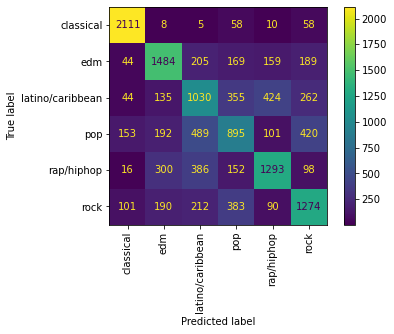

In [10]:
# look at confusion matrix
plot_confusion_matrix(fitted_grid1, X_test, y_test,xticks_rotation='vertical')

In [38]:
# calculate y predictions for classification report and print
y_pred = fitted_grid1.predict(X_test)
print(classification_report(y_pred, y_test))

                  precision    recall  f1-score   support

       classical       0.94      0.86      0.89      2469
             edm       0.66      0.64      0.65      2309
latino/caribbean       0.46      0.44      0.45      2327
             pop       0.40      0.44      0.42      2012
      rap/hiphop       0.58      0.62      0.60      2077
            rock       0.57      0.55      0.56      2301

        accuracy                           0.60     13495
       macro avg       0.60      0.59      0.60     13495
    weighted avg       0.61      0.60      0.60     13495



We can see that classical is the only genre that performs fairly well in terms of True Positives (94% precision) annd True negatives (86% recall). Not many genres are confused with Classical, the model is good at correctly predicting this genre and does not often confuse it with others.

EDM is next best wit hand f1 score of 65%, it is more often confused with other genres than classical.

The remaining genres all perform poorly in terms of precision and recall. Each of these 3 genres performs similarly within itself in terms of precision and recall - i.e. they both incorrectly classify other genres into their own category (low recall) and when predicted have low confidence that the predicted genre is the one reported (low precision).

Pop is the worst, which makes sense as pop can often transcend other genre categories.

Based on this baseline model, we can build an expectation that supervised learning isn't a great genre predictor as there is much genre crossover across contemporary genres - which is what we suspected and why we are also running unsupervised models to see what clusters we can derive from features/ attributes of songs rather than focusing on subjective 'human' genre tags.

We will proceed with the remaining supervised algorithms of course, to see if we can improve overall accuracy, precision and recall across the board, or even within one or more genres.

In [12]:
# create dataframe of confusion matrix for later use
logreg_cf_df = pd.DataFrame(confusion_matrix(y_test, y_pred)).rename(index=class_dict, columns=class_dict)
logreg_cf_df

,classical,edm,latino/caribbean,pop,rap/hiphop,rock
classical,2111,8,5,58,10,58
edm,44,1484,205,169,159,189
latino/caribbean,44,135,1030,355,424,262
pop,153,192,489,895,101,420
rap/hiphop,16,300,386,152,1293,98
rock,101,190,212,383,90,1274


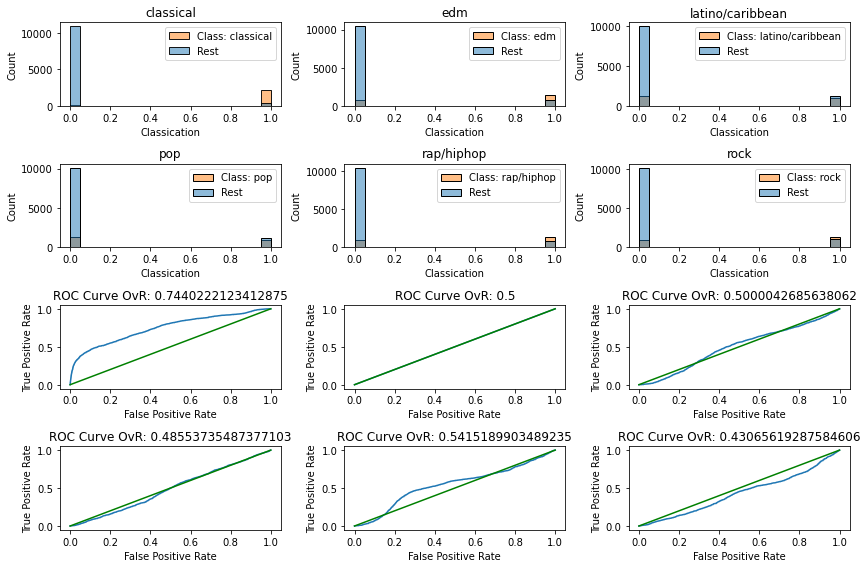

In [40]:
# originally plotted the Probability Distributions but the probabilities are all minutely small (much smaller than 0.1)
# have instead plotted one versus rest predictions (not probabilities) and ROC AUC curves
# this code is from
# https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = fitted_grid1.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    y_proba = fitted_grid1.best_estimator_.steps[len(fitted_grid1.best_estimator_.steps)-1][1].predict_proba(X_test)
    
    # Prepares dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['pred'] = [1 if y == c else 0 for y in y_pred]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(4, 3, i+1)
    sns.histplot(x = "pred", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel('Classication')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(4, 3, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR: {roc_auc_ovr[c]}")
    
    plt.tight_layout()

### 3.2 Support Vector Machine (SVM) Model Pipeline <a id="3.2"></a>

Run SVM model, linear and rbf kernels for various regularization and gamma hyperparameters:

In [14]:
from tempfile import mkdtemp
cachedir = mkdtemp()

# set up estimators and pipeline
estimators = [
    ('scaling', MinMaxScaler()),
#     ('dimension_red', PCA()),
    ('classifier', SVC())
]

pipe2 = Pipeline(estimators, memory = cachedir)

# Create Parameter grid
param_grid2 = [
    {
        'classifier': [SVC()],
        'scaling': [MinMaxScaler()],
#         'dimension_red': [PCA(), None],
#         'dimension_red__n_components': [0.9, 3, 6],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': [0.1, 10, 100],
        'classifier__C': [1, 10, 100]
#     },
#     {
#         'classifier': [KNN()],
#         'scaling': [StandardScaler()],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9],
#         'classifier__n_neighbors': [20]
#     },
#     {
#         'classifier': [RandomForestClassifier()],
#         'scaling':[None],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9, 3, 6],
#         'classifier__n_estimators': [20, 50, 100],
    }
]

# Run GridSearchCV
grid2 = GridSearchCV(pipe2, param_grid2, cv = 5)

fitted_grid2 = grid2.fit(X_train, y_train)

# append scores for later summary results plotting
model_scores.append(fitted_grid2.score(X_test, y_test))

model_names.append(list(fitted_grid2.best_params_.values())[0])

In [15]:
# what are the best selected model and parameters
fitted_grid2.best_params_

{'classifier': SVC(C=1, gamma=10),
 'classifier__C': 1,
 'classifier__gamma': 10,
 'classifier__kernel': 'rbf',
 'scaling': MinMaxScaler()}

In [16]:
# calculate y predictions for classification report and print
y_pred2 = fitted_grid2.predict(X_test)
print(classification_report(y_pred2, y_test))

                  precision    recall  f1-score   support

       classical       0.94      0.86      0.90      2457
             edm       0.69      0.69      0.69      2262
latino/caribbean       0.45      0.49      0.47      2051
             pop       0.45      0.47      0.46      2163
      rap/hiphop       0.65      0.63      0.64      2338
            rock       0.57      0.58      0.57      2224

        accuracy                           0.63     13495
       macro avg       0.63      0.62      0.62     13495
    weighted avg       0.64      0.63      0.63     13495



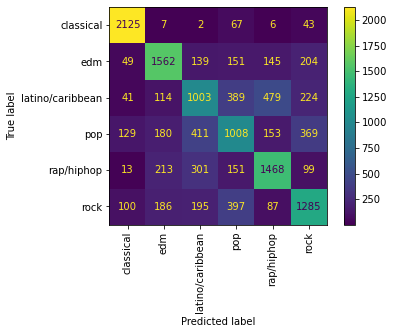

In [17]:
# look at confusion matrix
plot_confusion_matrix(fitted_grid2, X_test, y_test,xticks_rotation='vertical')

Better accuracy, precision and recall across the board, but only slightly better and the profiles are the same across genres.

In [18]:
# create dataframe of confusion matrix for later use
sv_cf_df = pd.DataFrame(confusion_matrix(y_test, y_pred2)).rename(index=class_dict, columns=class_dict)
sv_cf_df

,classical,edm,latino/caribbean,pop,rap/hiphop,rock
classical,2125,7,2,67,6,43
edm,49,1562,139,151,145,204
latino/caribbean,41,114,1003,389,479,224
pop,129,180,411,1008,153,369
rap/hiphop,13,213,301,151,1468,99
rock,100,186,195,397,87,1285


### 3.3 K-Nearest Neighbors (KNN) Model Pipeline <a id="3.3"></a>

Run KNN for various n_neighbours and scaler types:

In [19]:
from tempfile import mkdtemp
cachedir = mkdtemp()

# set up estimators and pipeline
estimators = [
    ('scaling', MinMaxScaler()),
#     ('dimension_red', PCA()),
    ('classifier', SVC())
]

pipe3 = Pipeline(estimators, memory = cachedir)

# Create Parameter grid
param_grid3 = [
#     {
#         'classifier': [SVC()],
#         'scaling': [MinMaxScaler()],
#         'dimension_red': [PCA()],
#         'dimension_red__n_components': [0.9, 3, 6],
#         'classifier__kernel': ['linear', 'rbf'],
#         'classifier__C': [1, 10, 100]
#     },
    {
        'classifier': [KNN()],
        'scaling': [StandardScaler(), MinMaxScaler()],
#         'dimension_red':[PCA(), None],
#         'dimension_red__n_components': [0.9],
        'classifier__n_neighbors': [5, 10, 20]
#     },
#     {
#         'classifier': [RandomForestClassifier()],
#         'scaling':[None],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9, 3, 6],
#         'classifier__n_estimators': [20, 50, 100],
    }
]

# Run GridSearchCV
grid3 = GridSearchCV(pipe3, param_grid3, cv = 5)

fitted_grid3 = grid3.fit(X_train, y_train)

# append scores for later summary results plotting
model_scores.append(fitted_grid3.score(X_test, y_test))

model_names.append(list(fitted_grid3.best_params_.values())[0])

In [20]:
# what are the best selected model and parameters
fitted_grid3.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=20),
 'classifier__n_neighbors': 20,
 'scaling': StandardScaler()}

In [21]:
# calculate y predictions for classification report and print
y_pred3 = fitted_grid3.predict(X_test)
print(classification_report(y_pred3, y_test))

                  precision    recall  f1-score   support

       classical       0.94      0.85      0.89      2492
             edm       0.71      0.66      0.68      2416
latino/caribbean       0.43      0.49      0.46      1989
             pop       0.44      0.44      0.44      2269
      rap/hiphop       0.64      0.63      0.63      2263
            rock       0.52      0.57      0.54      2066

        accuracy                           0.61     13495
       macro avg       0.61      0.60      0.61     13495
    weighted avg       0.62      0.61      0.62     13495



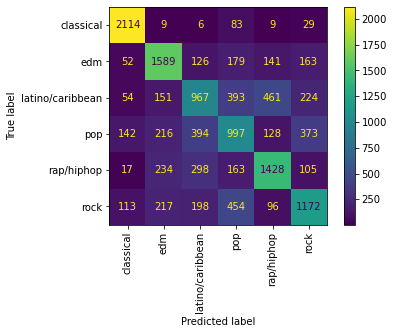

In [22]:
# look at confusion matrix
plot_confusion_matrix(fitted_grid3, X_test, y_test,xticks_rotation='vertical')

In [23]:
# create dataframe of confusion matrix for later use
knn_cf_df = pd.DataFrame(confusion_matrix(y_test, y_pred3)).rename(index=class_dict, columns=class_dict)
knn_cf_df

,classical,edm,latino/caribbean,pop,rap/hiphop,rock
classical,2114,9,6,83,9,29
edm,52,1589,126,179,141,163
latino/caribbean,54,151,967,393,461,224
pop,142,216,394,997,128,373
rap/hiphop,17,234,298,163,1428,105
rock,113,217,198,454,96,1172


Our KNN score is lower than our SVM score, however it indicated that Standard Scaler was the better scaler for this model. No improvement in the metrics worth reporting.

### 3.4 Random Forest and Gradient Boost Models Pipeline <a id="3.4"></a>

Run Randon Forests (ensemble DT model), AdaBoost and XGBoost models with various hyperparameters:

In [24]:
from tempfile import mkdtemp
cachedir = mkdtemp()

# set up estimators and pipeline
estimators = [
    ('scaling', MinMaxScaler()),
    ('dimension_red', PCA()),
    ('classifier', SVC())
]

pipe4 = Pipeline(estimators, memory = cachedir)

# Create Parameter grid
param_grid4 = [
    {
        'classifier': [AdaBoostClassifier()],
    },
    {
        'classifier': [XGBClassifier()],
    },
    {
        'classifier': [RandomForestClassifier()],
#         'scaling':[None],
#         'dimension_red':[PCA()],
#         'dimension_red__n_components': [0.9],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [5, 7, 10, 15, 20]
    }
]

# Run GridSearchCV
grid4 = GridSearchCV(pipe4, param_grid4, cv = 5)

fitted_grid4 = grid4.fit(X_train, y_train)

fitted_grid4.best_params_

# append scores for later summary results plotting
model_scores.append(fitted_grid4.score(X_test, y_test))

model_names.append(list(fitted_grid4.best_params_.values())[0])

In [36]:
# what are the best selected model and parameters
fitted_grid4.best_params_

{'classifier': RandomForestClassifier(max_depth=15),
 'classifier__criterion': 'gini',
 'classifier__max_depth': 15}

In [25]:
# calculate y predictions for classification report and print
y_pred4 = fitted_grid4.predict(X_test)
print(classification_report(y_pred4, y_test))

                  precision    recall  f1-score   support

       classical       0.94      0.87      0.90      2446
             edm       0.69      0.70      0.70      2218
latino/caribbean       0.45      0.49      0.47      2053
             pop       0.45      0.46      0.45      2181
      rap/hiphop       0.66      0.62      0.64      2364
            rock       0.56      0.57      0.56      2233

        accuracy                           0.62     13495
       macro avg       0.62      0.62      0.62     13495
    weighted avg       0.63      0.62      0.63     13495



In [41]:
# reminder of the latest best model - SVM model from above
y_pred2 = fitted_grid2.predict(X_test)
print(classification_report(y_pred2, y_test))

                  precision    recall  f1-score   support

       classical       0.94      0.86      0.90      2457
             edm       0.69      0.69      0.69      2262
latino/caribbean       0.45      0.49      0.47      2051
             pop       0.45      0.47      0.46      2163
      rap/hiphop       0.65      0.63      0.64      2338
            rock       0.57      0.58      0.57      2224

        accuracy                           0.63     13495
       macro avg       0.63      0.62      0.62     13495
    weighted avg       0.64      0.63      0.63     13495



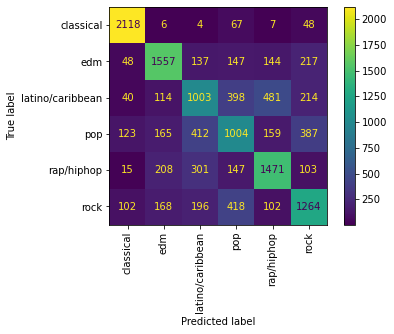

In [26]:
# look at confusion matrix
plot_confusion_matrix(fitted_grid4, X_test, y_test,xticks_rotation='vertical')

In [27]:
# create dataframe of confusion matrix for later use
rf_cf_df = pd.DataFrame(confusion_matrix(y_test, y_pred4)).rename(index=class_dict, columns=class_dict)
rf_cf_df

,classical,edm,latino/caribbean,pop,rap/hiphop,rock
classical,2118,6,4,67,7,48
edm,48,1557,137,147,144,217
latino/caribbean,40,114,1003,398,481,214
pop,123,165,412,1004,159,387
rap/hiphop,15,208,301,147,1471,103
rock,102,168,196,418,102,1264


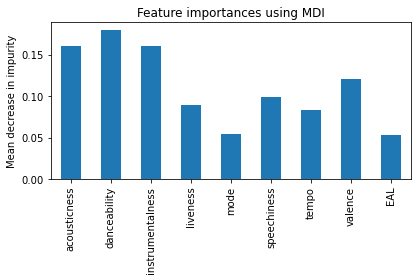

In [28]:
# run feature_importance function from capstone_functions notebook
feature_importance(fitted_grid4)

The Random Forests ensemble learning model performed pretty much indentically to the SVM model.

We have pulled the feature importances for the Random Forests model and the features that are highlighted as most important are:

- acousticness
- danceability
- instrumentalness
- valence

In the next notebook we will see if these features are also the most important in unsupervised song clustering - we expect the same features will drive cluster formation in unsupervised learning.

### 4. Ensemble Learning <a id="4"></a>

Let's employ Ensemble learning with our best models from each pipeline above and see if that improves the results.

In [29]:
from tempfile import mkdtemp
cachedir = mkdtemp()

# set up estimators and pipeline
Logreg_model = LogisticRegression(penalty='l2', C=1, max_iter=10000)
KNN_model = KNN(n_neighbors=20)
SVM_model = SVC(kernel='rbf', probability=True)


estimators=[('scaling', MinMaxScaler()),
            ('dimension_red', PCA()),
            ('classifier', SVC())
           ]

pipe5 = Pipeline(estimators, memory = cachedir)

voting_ensemble = VotingClassifier(estimators=[('Logreg Model', Logreg_model),
                                               ('SVM Model RBF', SVM_model),
                                               ('KNN Model', KNN_model)], voting="soft", weights=[1, 1, 1])

# Create Parameter grid
param_grid5 = [
    {
        'classifier': [voting_ensemble],
        'scaling': [MinMaxScaler()],
        'dimension_red': [PCA()],
        'dimension_red__n_components': [0.9]
    }]

# Run GridSearchCV
grid5 = GridSearchCV(pipe5, param_grid5, cv = 5)

fitted_grid5 = grid5.fit(X_train, y_train)

fitted_grid5.best_params_

# append scores for later summary results plotting
model_scores.append(fitted_grid5.score(X_test, y_test))

model_names.append(list(fitted_grid5.best_params_.values())[0])

In [31]:
# calculate y predictions for classification report and print
y_pred5 = fitted_grid5.predict(X_test)
print(classification_report(y_pred5, y_test))

                  precision    recall  f1-score   support

       classical       0.95      0.84      0.89      2547
             edm       0.65      0.62      0.63      2363
latino/caribbean       0.51      0.43      0.47      2649
             pop       0.33      0.43      0.37      1733
      rap/hiphop       0.38      0.41      0.40      2114
            rock       0.42      0.45      0.44      2089

        accuracy                           0.54     13495
       macro avg       0.54      0.53      0.53     13495
    weighted avg       0.56      0.54      0.55     13495



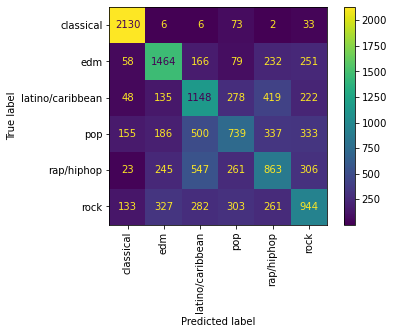

In [37]:
# look at confusion matrix
plot_confusion_matrix(fitted_grid5, X_test, y_test,xticks_rotation='vertical')

In [32]:
# create dataframe of confusion matrix for later use
voting_ensemble_df = pd.DataFrame(confusion_matrix(y_test, y_pred5)).rename(index=class_dict, columns=class_dict)
voting_ensemble_df

,classical,edm,latino/caribbean,pop,rap/hiphop,rock
classical,2130,6,6,73,2,33
edm,58,1464,166,79,232,251
latino/caribbean,48,135,1148,278,419,222
pop,155,186,500,739,337,333
rap/hiphop,23,245,547,261,863,306
rock,133,327,282,303,261,944


The Voting Ensemble did not perform better than the Random Forests model or the SVM model.

Our expectation set when we looked at the result of the baseline model stands.

## 5. Amalgamating the Results <a id="5"></a>

Collate results by plotting AUC / accuracy scores by model, look at confusion matrices together and feature importance.

In [33]:
model_scores_df1 = pd.DataFrame((model_names,model_scores), index=None).T
model_scores_df = model_scores_df1.rename(columns={0:'Model', 1:'Acc_Score'})
model_scores_df.sort_values("Acc_Score", ascending=False)

,Model,Acc_Score
1,"SVC(C=1, gamma=10)",0.626232
3,RandomForestClassifier(max_depth=15),0.623712
2,KNeighborsClassifier(n_neighbors=20),0.612597
0,"LogisticRegression(C=100, max_iter=10000)",0.599259
4,"VotingClassifier(estimators=[('Logreg Model',\...",0.540052


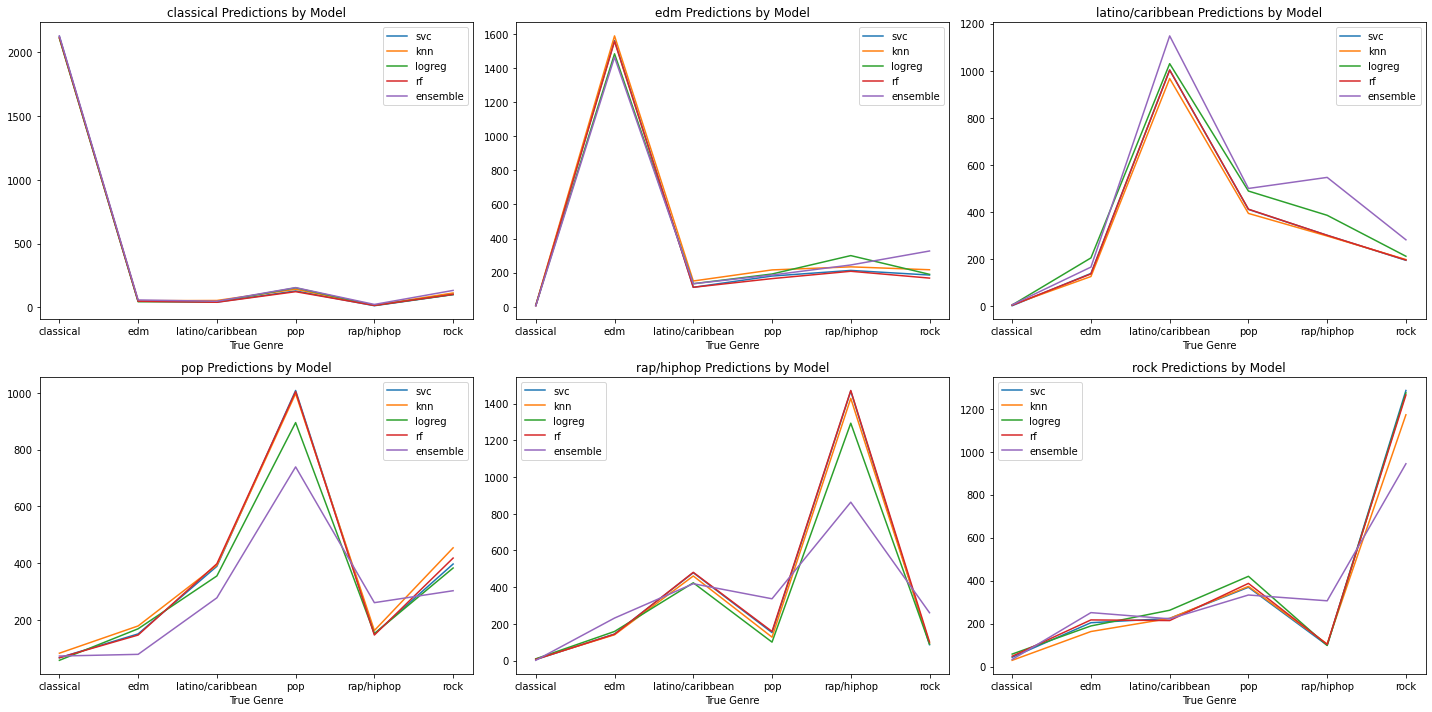

In [44]:
# these graphs are discussed in the following conclusion
plt.subplots(2,3, figsize=(20,10))

i=1

for c in class_dict.values():
    plt.subplot(2,3,i)
    plt.plot(sv_cf_df.columns, sv_cf_df[c], label='svc')
    plt.plot(knn_cf_df.columns, knn_cf_df[c], label='knn')
    plt.plot(logreg_cf_df.columns, logreg_cf_df[c], label='logreg')
    plt.plot(rf_cf_df.columns, rf_cf_df[c], label='rf')
    plt.plot(voting_ensemble_df.columns, voting_ensemble_df[c], label='ensemble')
    plt.legend()
    plt.xlabel('True Genre')
    plt.title(f'{c} Predictions by Model')
    i=i+1

plt.tight_layout()

### Conclusion

All of the models performed similarly, with the Random Forests and SVM RBF models outperforming the rest slightly.

The graphs directly above plot prediction outputs for each model on top of each one another with one graph per class, against the true genres (which are on the x-axis).

We are looking for the model that peaks highest for the True Genre prediction, but lowest below the other models for the other True Genres (i.e. that do not match the prediction). This is most often the Random Forests and SVM models, which track together across the graphs.

We can see that different models were better predicting different genres - for example, random forests was best at predicting latino/caribbean but poorest at pop and rap/hiphop, likely because it often mistook these 2 genres for latino/caribbean.

***Expectation set at beginning that still stands at the end of our model iterations:***
Classical is conceptually easiest to separate from other genres:
Classical is the only genre that performs fairly well in terms of True Positives (94% precision) annd True negatives (86% recall). Not many genres are confused with Classical, the model is good at correctly predicting this genre and does not often confuse it with others.

EDM is next best with an f1 score of 65%, it is more often confused with other genres than classical is but not as much as other contemporary genres.

The remaining genres all perform poorly in terms of precision and recall. Each of these 3 genres performs similarly within itself in terms of precision and recall - i.e. the models both incorrectly classify other genres into the category (low recall) and when predicted have low confidence that the predicted genre is the one reported (low precision).

Pop is the worst, which makes sense as pop can often transcend other genre categories.

Based on this baseline model, we can build an expectation that supervised learning isn't a great genre predictor as there is much genre crossover across contemporary genres - which is what we suspected and why we are also running unsupervised models to see what clusters we can derive from features/ attributes of songs rather than focusing on subjective 'human' genre tags.